In [109]:
#Part 1 gain and read noise

In [110]:
# Imports all the necessary libraries/shortcuts

%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit


# Makes an empty array for all of the bias arrays
bias = []
for i in range(1,11):
    bias.append(fits.getdata('Bias-'+ "0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))

# Makes an empty array for all of the dark arrays
dark = []
for i in range(1,11):
    dark.append(fits.getdata('Dark-'+ "0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))

# Makes an empty array for all of the flat 144 arrays
flat144 = []
for i in range(1,11):
    flat144.append(fits.getdata('Flat144-'+ "0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))

# Makes an empty array for all of the flat 200 arrays
flat200 = []
for i in range(1,11):
    flat200.append(fits.getdata('Flat200-'+ "0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))

# Makes an empty array for all of the flat 255 arrays
flat255 = []
for i in range(1,11):
    flat255.append(fits.getdata('Flat255-'+ "0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))

In [111]:
# Makes an array of arrays for bias frames

bias = np.asarray(bias)

# Makes an array of arrays for dark frames

dark = np.asarray(dark)

# Makes an array of arrays for flat 144

flat144 = np.asarray(flat144)

# Makes an array of arrays for flat 200

flat200 = np.asarray(flat200)

# Makes an array of arrays for flat 255

flat255 = np.asarray(flat255)



# Makes array of means for each variable

biasmean = bias.mean(axis=0)
biasvar = bias.var()
# Makes array of means for dark

darkmean = dark.mean(axis=0)

# Makes array of means for flat 144

flat144mean = flat144.mean(axis=0)

# Makes array of means for flat

flat200mean = flat200.mean(axis=0)

# Makes array of means for flat

flat255mean = flat255.mean(axis=0)

# Delete later
print(flat255mean.shape)
print(flat255.shape)
print(biasvar)

(2504, 3326)
(10, 2504, 3326)
456.01389240662206


In [112]:
# Mean and Variance for Flat 144
F144 = (flat144 - biasmean)
F144mean = F144.mean()
# Finds variance
F144var = F144.var(axis=0)
# Finds mean of the variance
F144varmean = F144var.mean()

In [113]:
# Mean and Variance for Flat 200
F200 = (flat200 - biasmean)
F200mean = F200.mean()
F200var = F200.var(axis=0)
F200varmean = F200var.mean()

In [114]:
# Mean and Variance for Flat 255
F255 = (flat255 - biasmean)
F255mean = F255.mean()
F255var = F255.var(axis=0)
F255varmean = F255var.mean()

In [115]:
# Linear function defintion
def func (x,m,b):
    return m*x+b

m0,b0 = (.5,0)
x = [F144mean, F200mean, F255mean]
y = [F144varmean, F200varmean, F255varmean]
coeffs, fiterr = curve_fit(func, x, y, p0 = (m0,b0))

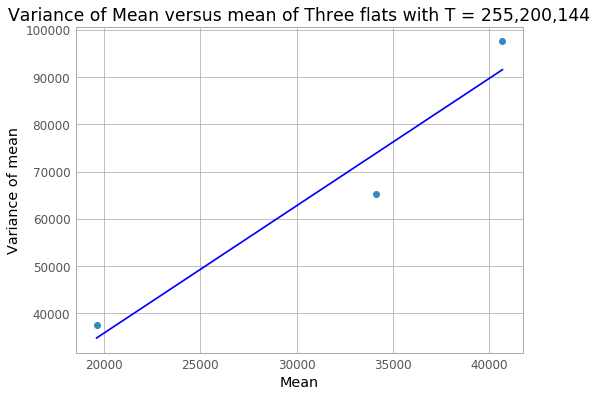

Gain Value= 0.3703831740498057
Readnoise =  7.2032006737084


In [116]:
plt.scatter(x, y)
plt.plot(x, func(np.asarray(x), *coeffs), color = 'b')
plt.title('Variance of Mean versus mean of Three flats with T = 255,200,144')
plt.xlabel('Mean')
plt.ylabel('Variance of mean')
plt.show()

print('Gain Value=', 1/coeffs[0])

# Read noise is (gain * standard deviation)/2**(1/2)
print ('Readnoise = ', (1/coeffs[0]*bias.std(axis = 0).mean()))
gain = 1/coeffs[0]
# GAIN IS CONVERSION BETWEEN ADU AND ELECTRON

In [117]:
# Part 2 Dark Current

In [118]:
# Makes all groups data into an array
darkDay2 = []
# Group AA data
darkDay2.append(fits.getdata("GroupAADark_Day_2_6cexp900-0001.fit", ext=0).astype(np.int))
darkDay2.append(fits.getdata("GroupAADark_Day_2_9cexp300-0001.fit", ext=0).astype(np.int))

#Group A data
darkDay2.append(fits.getdata("GroupADarkT4.6Exp450.fit", ext=0).astype(np.int))
darkDay2.append(fits.getdata("GroupADarkT8.9Exp300.fit", ext=0).astype(np.int))

# Group BB data
darkDay2.append(fits.getdata("GroupBBDarkT7Exp400.fit", ext=0).astype(np.int))
darkDay2.append(fits.getdata("GroupBBDarkT8Exp400.fit", ext=0).astype(np.int))

#Group B data
darkDay2.append(fits.getdata("GroupBDarkT6Exp300.fit", ext=0).astype(np.int))
darkDay2.append(fits.getdata("GroupBDarkT9Exp600.fit", ext=0).astype(np.int))

#Group C data
darkDay2.append(fits.getdata("GroupCDarkT7.1Exp400.fit", ext=0).astype(np.int))
darkDay2.append(fits.getdata("GroupCDarkT9.4Exp300.fit", ext=0).astype(np.int))

# Group D data
darkDay2.append(fits.getdata("GroupDDarkT7Exp600.fit", ext=0).astype(np.int))
darkDay2.append(fits.getdata("GroupDDarkT9.4Exp300.fit", ext=0).astype(np.int))

# Group Mason
darkDay2.append(fits.getdata("DarkT6exp600-0001.fit", ext=0).astype(np.int))
darkDay2.append(fits.getdata("DarkT9exp600-0001.fit", ext=0).astype(np.int))


darkDay2 = np.asarray(darkDay2)

In [119]:
# Download Biases from day 2
biasDay2 = []
for i in range(1,30):
    biasDay2.append(fits.getdata('Bias-Day2--'+ "0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))


#BiasDay2 mean
biasDay2 = np.asarray(biasDay2)
biasDay2mean = biasDay2.mean(axis=0)


In [120]:
# Mean for Dark divided by exposure time
D = (darkDay2 - biasDay2mean)

# Take median and divide by exposure time 
darkmedianT6Ex900 = np.median(D[0])/900
darkmedianT9Ex300 = np.median(D[1])/300
darkmedianT4_6Ex450 = np.median(D[2])/450
darkmedianT8_9ex300 = np.median(D[3])/300
darkmedianT7ex400 = np.median(D[4])/400
darkmedianT8ex400 = np.median(D[5])/400
darkmedianT6ex300 = np.median(D[6])/300
darkmedianT9ex600 = np.median(D[7])/600
darkmedianT7_1ex400 = np.median(D[8])/400
darkmedianT9_4ex300 = np.median(D[9])/300
darkmedianT7ex600 = np.median(D[10])/600
darkmedianT9_4ex300 = np.median(D[11])/300
darkmedianT6ex600 = np.median(D[12])/600
darkmedianT9ex600 = np.median(D[13])/600

In [121]:
# Use Kelvin variable to convert Celsius to Kelvin
Kelvin = 273.15
x = [6 + Kelvin, 9+ Kelvin, 4.6+ Kelvin, 8.9+ Kelvin, 7+ Kelvin, 8+ Kelvin, 6+ Kelvin, 9+ Kelvin, 7.1+ Kelvin, 9.4+ Kelvin, 7+ Kelvin, 9.4+ Kelvin, 6+ Kelvin, 9+ Kelvin]

# Dark current median values
y = [darkmedianT6Ex900,darkmedianT9Ex300, darkmedianT4_6Ex450, 
darkmedianT8_9ex300, darkmedianT7ex400, darkmedianT8ex400, darkmedianT6ex300,darkmedianT9ex600, 
darkmedianT7_1ex400, darkmedianT9_4ex300,darkmedianT7ex600,darkmedianT9_4ex300, darkmedianT6ex600, darkmedianT9ex600]
coeffs, fiterr = curve_fit(func, x, y)

In [122]:
# Function definition for curved fit
def func2 (T,E,A):
    return A*T**(1.5)*np.exp(-E/(2*(8.61*10**(-5))*T))

E0,A0 = (0.5,130)

# Rearranged X and Y values in assending temperature order, multiplying by gain to get eV
rearrangedx2 = [4.6 + Kelvin, 6+ Kelvin, 6+ Kelvin, 6+ Kelvin, 7+ Kelvin, 7+ Kelvin, 7.1+ Kelvin, 8+ Kelvin, 8.9+ Kelvin, 9+ Kelvin, 9+ Kelvin, 9+ Kelvin, 9.4+ Kelvin, 9.4+ Kelvin]
rearrangedy2 = np.array([darkmedianT4_6Ex450, darkmedianT6ex300, darkmedianT6ex600, darkmedianT6Ex900,darkmedianT7ex400, darkmedianT7ex600, darkmedianT7_1ex400, darkmedianT8ex400, darkmedianT8_9ex300, darkmedianT9Ex300, darkmedianT9ex600, darkmedianT9ex600, darkmedianT9_4ex300,darkmedianT9_4ex300]) * gain

coeffs2, fiterr = curve_fit(func2, rearrangedx2, rearrangedy2, p0=(E0,A0))

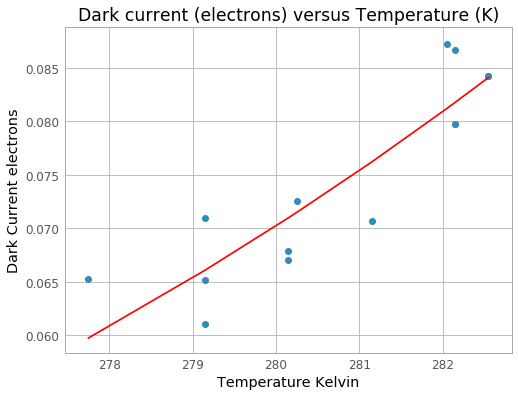

Calculated Silicon band gap 0.8892676361591356
Theorized value for Silicon =  1.14


In [123]:
# curve fit

plt.plot(rearrangedx2,func2(np.array(rearrangedx2),*coeffs2), color = 'r') # Plots line
plt.scatter(rearrangedx2, rearrangedy2)
plt.title('Dark current (electrons) versus Temperature (K)')
plt.xlabel('Temperature Kelvin')
plt.ylabel('Dark Current electrons')
plt.show()

print ("Calculated Silicon band gap", coeffs2[0])
print ("Theorized value for Silicon = ",1.14)

In [124]:
# E, band gap energy
coeffs2[0]

0.8892676361591356

In [125]:
# A
coeffs2[1]

1533.6693749718474